In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
my_example_nc_file = './PBLH20150101_V1.nc'
fh = Dataset(my_example_nc_file, mode='r')


In [3]:
my_example_nc_file

'./PBLH20150101_V1.nc'

In [4]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
tmax = fh.variables['pblh'][:].T



In [5]:
fh.close()


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [8]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [9]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


In [10]:
tmax.shape

(140, 240)

In [11]:
lon.shape, lat.shape, tmax.shape

((140, 240), (140, 240), (140, 240))

/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


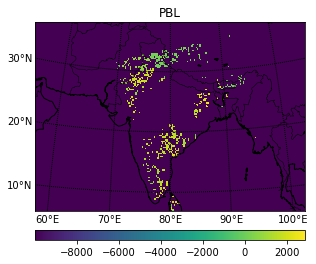

In [12]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(tmax))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label(tmax_units)

# Add Title
plt.title('PBL')

plt.show()